# Summary
## 1. Exploratory Data Analysis [EDA]
## 2. Overview of variable analysis using Logistic Regression as baseline model
## 3. Cleaning using fill of missing data
## 4. Variable analysis
## 5. Outcome
## 6. Correlation between variables
## 7. Univariable analysis
## 8. Baseline model
## 9. Machine learning models
## 10. Feature importance analysis
## 11. Model comparasion
## 12. Conclusion
## 13. References

# Nội dung chính
## 1. Khai phá dữ liệu
## 2. Tổng quan phân tích biến số bằng thuật toán hồi qui Logistic như là mô hình khởi điểm để so sánh
## 3. Làm sạch dữ liệu bằng cách điền vào dữ liệu khuyết thiếu
## 4. Phân tích biến số
## 5. Phân tích biến đầu ra `Outcome`
## 6. Mối tương quan giữa các biến
## 7. Phân tích đơn biến
## 8. Xây dựng mô hình dự báo cơ sở với dataset đã được làm sạch
## 9. Xây dựng mô hình dự báo dựa trên các thuật toán học máy
## 10. Phân tích các biến số quan trọng
## 11. So sánh hiệu năng các mô hình dự báo
## 12. Tạm kết
## 13. Tài liệu tham khảo

## Trong phạm vi bài này, chúng ta sẽ xây dựng mô hình dự báo phát sinh bệnh dựa trên cơ sở dữ liệu PIMA Indians Diabetes
## Dữ liệu có thể tải tại đây https://www.kaggle.com/uciml/pima-indians-diabetes-database

## Install missing packages
## Cài đặt các thư viện còn thiếu

In [105]:
#install.packages("ggcorrplot")
#install.packages("ROCR")
#install.packages("rpart.plot")
#install.packages('e1071')
#install.packages( c("xts","quantmod") )
# package DMwR is not availabe anymore, so we have to install from source code
# Source code can be downloaded here https://cran.r-project.org/src/contrib/Archive/DMwR/
# Do thư viện DMwR không còn tồn tại trên CRAN nữa nên, chúng ta buộc phải cài từ mã nguồn
# Mã nguồn tải tại đây: https://cran.r-project.org/src/contrib/Archive/DMwR/
# Do không cài được DMwR nên đành cài DMwR2.
# Kết quả vẫn chạy được các hàm mình cần sử dụng trong bài này
#install.packages("DMwR2") #, repos=NULL, type="source" )
#install.packages(c('mice', 'pROC', 'caret'))
#install.packages('doMC')
#install.packages('corrplot')
#install.packages('Boruta')
#install.packages('glmnet')
#install.packages('xgboost')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



## Load need libraries
## Khởi tạo các thư viện cần thiết

In [106]:
# random seeds
set.seed(3)


library(tidyverse)
library(corrplot)
library(ggcorrplot)
library(gridExtra)
library(rpart.plot)
library(e1071)
library(mice)
library(DMwR2)
library(pROC)
library(glmnet)
library(caTools)
library(caret)
library(doMC)
library(ROCR)
library(xgboost)
library(ggcorrplot)
library(ggplot2) # Data visualization
library(readr) # CSV file I/O, e.g. the read_csv function
library(Boruta)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

system("ls /home/linh/Downloads")
registerDoMC(cores = detectCores() - 1)


Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice




In [3]:
dat <- read.csv("/home/linh/Downloads/diabetes.csv")
str(dat)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


### Nhận xét: ta có 9 biến và 768 mẫu quan sát
### Các biến có định dạng số nguyên (int) và số thập phân (num)
### Có biến `Outcome` là biến nhị phân đã được mã hóa là 0 và 1 (định dạng là số nguyên)

In [4]:
# Xem các bản ghi đầu tiên của dữ liệu
head(dat)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


In [5]:
# Xem các bản ghi cuối cùng của dữ liệu

tail(dat)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
763,9,89,62,0,0,22.5,0.142,33,0
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.340,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1
768,1,93,70,31,0,30.4,0.315,23,0


In [6]:
# Xem tên các biến của dữ liệu

names(dat)

[1] "Pregnancies"              "Glucose"                 
[3] "BloodPressure"            "SkinThickness"           
[5] "Insulin"                  "BMI"                     
[7] "DiabetesPedigreeFunction" "Age"                     
[9] "Outcome"

In [7]:
# Như đã bình luận ở trên, biến Outcome hiện đạng mã hóa dạng số
# Vậy ta cần mã hóa lại biến này
dat$Outcome <- factor(make.names(dat$Outcome))


In [8]:
summary(dat)


  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
 Outcome 
 X0

## Nhận xét, có 500 kết quả `Outcome` mã hóa là 0, nghĩa là không có bệnh
## Và có 268 kết quả `Outcome` mã hóa là 1, có nghĩa là có bệnh tiểu đường

In [9]:
# Create Age Category column
# Do biến tuổi là biến liên tục, nay ta chia biến này thành biến phân hạng 
# Và đặt thành tên biến mới là Age_Cat
dat$Age_Cat <- ifelse(dat$Age < 21, "<21", 
                   ifelse((dat$Age>=21) & (dat$Age<=25), "21-25", 
                   ifelse((dat$Age>25) & (dat$Age<=30), "25-30",
                   ifelse((dat$Age>30) & (dat$Age<=35), "30-35",
                   ifelse((dat$Age>35) & (dat$Age<=40), "35-40",
                   ifelse((dat$Age>40) & (dat$Age<=50), "40-50",
                   ifelse((dat$Age>50) & (dat$Age<=60), "50-60",">60")))))))

In [10]:
dat$Age_Cat <- factor(dat$Age_Cat, levels = c('<21','21-25','25-30','30-35','35-40','40-50','50-60','>60'))
table(dat$Age_Cat)


  <21 21-25 25-30 30-35 35-40 40-50 50-60   >60 
    0   267   150    81    76   113    54    27 

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


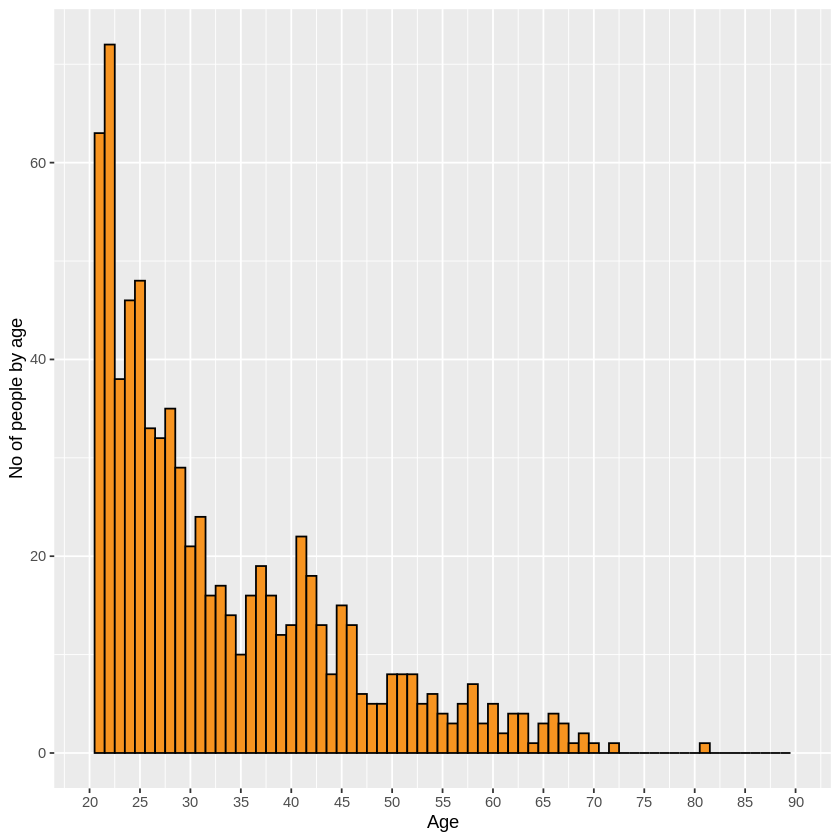

In [11]:
# Histogram of Age
# Biểu diễn biến tuổi dưới dạng biểu dồ Histogram

ggplot(aes(x = Age), data=dat) +
        geom_histogram(binwidth=1, color='black', fill = "#F79420") +
        scale_x_continuous(limits=c(20,90), breaks=seq(20,90,5)) +
        xlab("Age") +
        ylab("No of people by age")

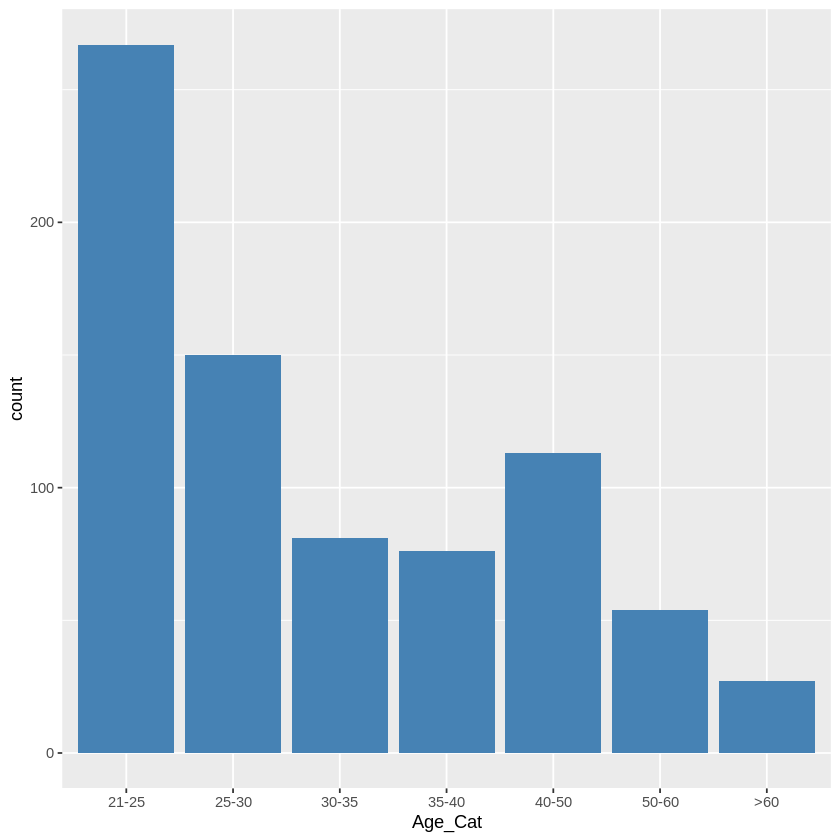

In [12]:
# Barplot by Age_Cat
# Biểu diễn biến tuổi dưới dạng biểu dồ Barplot

ggplot(aes(x = Age_Cat), data = dat) +
            geom_bar(fill='steelblue')

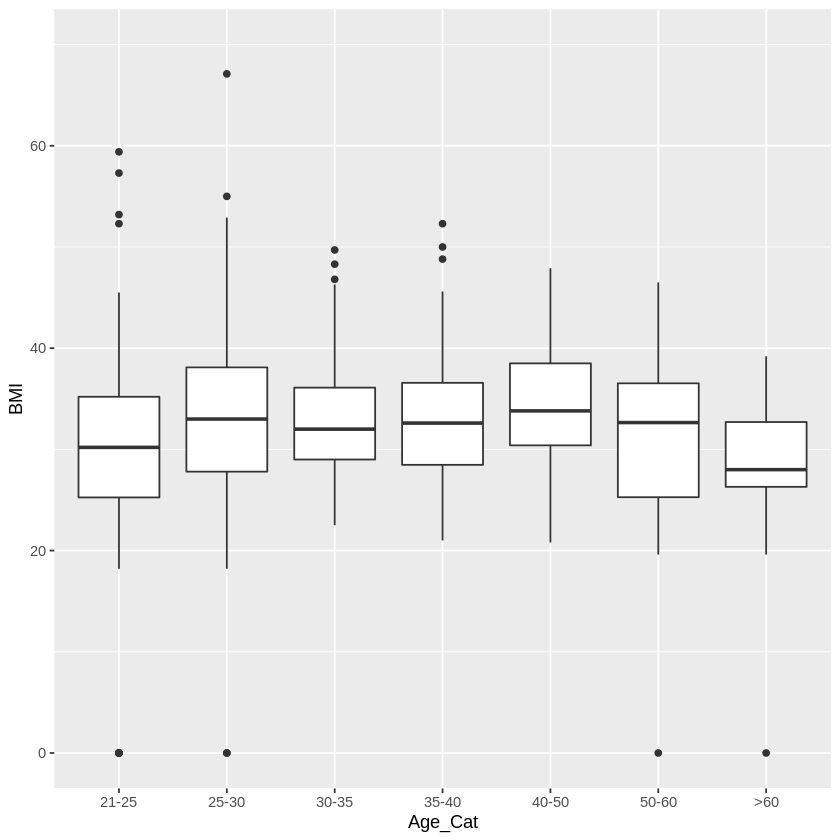

In [13]:
# box plot of Age_Cat vs BMI
# Biểu diễn biến tuổi so với biến BMI theo biểu đồ Box Plot

ggplot(aes(x=Age_Cat, y = BMI), data = dat) +
        geom_boxplot() +
        coord_cartesian(ylim = c(0,70))

In [14]:
# Tổng hợp thông tin thống kê của 2 biến BMI và tuổi (Age_Cat)
# bằng câu lệnh by và summary
by(dat$BMI, dat$Age_Cat, summary)

dat$Age_Cat: <21
NULL
------------------------------------------------------------ 
dat$Age_Cat: 21-25
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   25.25   30.20   30.36   35.20   59.40 
------------------------------------------------------------ 
dat$Age_Cat: 25-30
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   27.80   33.00   33.04   38.10   67.10 
------------------------------------------------------------ 
dat$Age_Cat: 30-35
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  22.50   29.00   32.00   32.81   36.10   49.70 
------------------------------------------------------------ 
dat$Age_Cat: 35-40
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  21.00   28.48   32.60   32.97   36.58   52.30 
------------------------------------------------------------ 
dat$Age_Cat: 40-50
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   20.8    30.4    33.8    34.5    38.5    47.9 
------------------------------------------------------------ 
dat$Age_Cat: 50-60
  

In [15]:
# Compute correlation matrix
# Tính ma trận tương quan của các biến 
# hàm round là làm tròn
# hàm cor là transform dữ liệu 
db_cor <- round(cor(dat[1:8]),1)
db_cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.0,0.1,0.1,-0.1,-0.1,0.0,0.0,0.5
Glucose,0.1,1.0,0.2,0.1,0.3,0.2,0.1,0.3
BloodPressure,0.1,0.2,1.0,0.2,0.1,0.3,0.0,0.2
SkinThickness,-0.1,0.1,0.2,1.0,0.4,0.4,0.2,-0.1
Insulin,-0.1,0.3,0.1,0.4,1.0,0.2,0.2,0.0
BMI,0.0,0.2,0.3,0.4,0.2,1.0,0.1,0.0
DiabetesPedigreeFunction,0.0,0.1,0.0,0.2,0.2,0.1,1.0,0.0
Age,0.5,0.3,0.2,-0.1,0.0,0.0,0.0,1.0


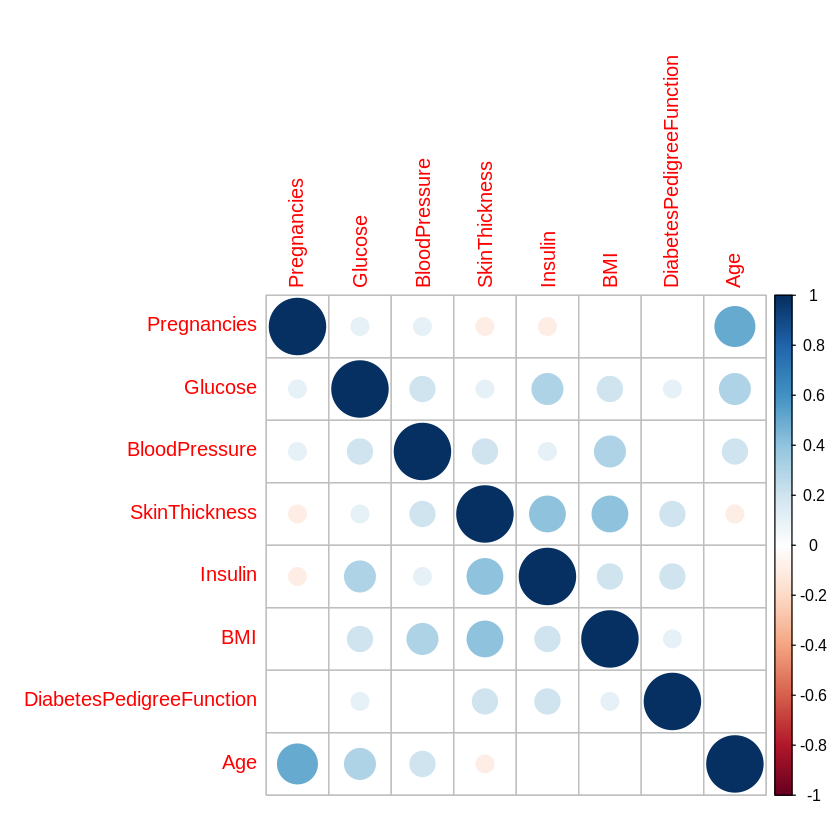

In [16]:
# Biểu diễn tương quan của các biến dưới dạng biểu đồ
# bằng hàm corrplot
corrplot(db_cor)

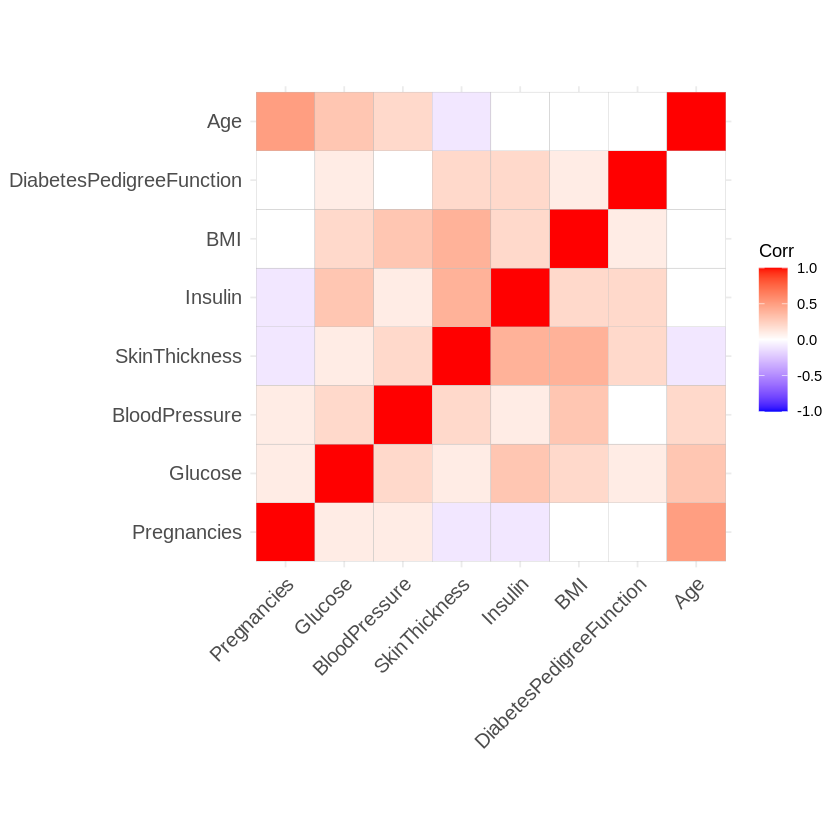

In [17]:
# Biểu diễn tương quan của các biến dưới dạng biểu đồ
# bằng hàm ggcorrplot
ggcorrplot(db_cor)

## Nhận xét: Biến `Prenancies` có mối tương quan mạnh nhất với biến `Age`
## Điều này thật ra rất dễ hiểu vì vấn đề mang thai hoàn toàn liên quan tới tuổi trưởng thành sinh học và xã hội

## Chia ngẫu nhiễn dữ liệu theo tỉ lệ 75%: 25% để huấn luyện mô hình

In [18]:
sample = sample.split(dat$Outcome, SplitRatio=0.75)
train = subset(dat, sample==TRUE)
test = subset(dat, sample==FALSE)


In [19]:
# Kiểm tra cỡ mẫu của toàn bộ dữ liệu
nrow(dat)


[1] 768

In [20]:
# Kiểm tra cỡ mẫu của tập huấn luyện
nrow(train)


[1] 576

In [21]:
# Kiểm tra cỡ mẫu của tập kiểm tra
nrow(test)


[1] 192

## Các bạn có thể tính lại bằng tay xem có đúng là dataset của chúng ta đã được chia theo tỉ lệ 3:1 chưa!?

In [22]:
# distribution of Age category in Train set
# Xem phân bố của biến tuổi đã được phân chia theo nhóm tuổi trong tập huấn luyện
table(train$Age_Cat)


  <21 21-25 25-30 30-35 35-40 40-50 50-60   >60 
    0   197   107    64    52    91    41    24 

In [23]:
# Structure of train set
# Xem cấu trúc dữ liệu ở tập huấn luyện
str(train)

'data.frame':	576 obs. of  10 variables:
 $ Pregnancies             : int  6 1 1 0 5 3 10 2 8 10 ...
 $ Glucose                 : int  148 85 89 137 116 78 115 197 125 168 ...
 $ BloodPressure           : int  72 66 66 40 74 50 0 70 96 74 ...
 $ SkinThickness           : int  35 29 23 35 0 32 0 45 0 0 ...
 $ Insulin                 : int  0 0 94 168 0 88 0 543 0 0 ...
 $ BMI                     : num  33.6 26.6 28.1 43.1 25.6 31 35.3 30.5 0 38 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.167 2.288 0.201 ...
 $ Age                     : int  50 31 21 33 30 26 29 53 54 34 ...
 $ Outcome                 : Factor w/ 2 levels "X0","X1": 2 1 1 2 1 2 1 2 2 2 ...
 $ Age_Cat                 : Factor w/ 8 levels "<21","21-25",..: 6 4 2 4 3 3 3 7 7 4 ...


## Nếu các bạn còn nhớ, giờ đây biến `Outcome` và biến `Age_Cat` đã được mã hóa dưới dạng Factor, thay vì int như ban đầu
## Việc này rất quan trọng để máy tính có thể hiểu dạng dữ liệu để làm phân tích

In [24]:
# Baseline model
# Xây dựng mô hình cơ bản ban đầu để so sánh với các mô hình tiếp theo
table(dat$Outcome)


 X0  X1 
500 268 

In [25]:
# Baseline accuracy
# Độ chính xác tổng quát làm cơ sở để so sánh
# Đây là việc xác xuất ngẫu nhiên khi ta chọn mẫu đó có hay không có bệnh
baseline <- round(500/nrow(dat),2)
baseline

[1] 0.65

## Fit Model using all independent variables
## Huấn luyện mô hình với tất cả các biến phụ thuộc


In [26]:
# Fit model - using all independent variables
# Huấn luyện mô hình bằng cách sử dụng tất cả các biến phụ thuộc bằng hàm glm

AllVar <- glm(Outcome ~ ., data = train, family = binomial)
summary(AllVar)


Call:
glm(formula = Outcome ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5680  -0.7074  -0.4311   0.7421   2.8979  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -6.140633   1.442614  -4.257 2.08e-05 ***
Pregnancies               0.043779   0.039640   1.104 0.269414    
Glucose                   0.034511   0.004255   8.111 5.00e-16 ***
BloodPressure            -0.015237   0.006253  -2.437 0.014818 *  
SkinThickness             0.004535   0.007823   0.580 0.562170    
Insulin                  -0.001881   0.001034  -1.819 0.068962 .  
BMI                       0.066069   0.017458   3.785 0.000154 ***
DiabetesPedigreeFunction  1.042778   0.353860   2.947 0.003210 ** 
Age                      -0.048658   0.052789  -0.922 0.356659    
Age_Cat25-30              0.557992   0.418509   1.333 0.182439    
Age_Cat30-35              1.370840   0.626633   2.188 0.028697 *  


In [27]:
# Let's predict outcome on Training dataset
# Thử hiệu năng dự đoán của mô hình trên tập huấn luyện
PredictTrain <- predict(AllVar, type = "response")
summary(PredictTrain)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0024  0.1162  0.2667  0.3490  0.5489  0.9876 

In [28]:
# This computes the average prediction for each of the two outcomes
# Mô hình tính toán giá trị dự báo trung bình cho 1 trong 2 giá trị của biến Outcome

tapply(PredictTrain, train$Outcome, mean)

X0        X1 
0.2339362 0.5635518

## Build Confusion Matrix
## Xây dựng ma trận hỗn độn 
### Theo kinh nghiệm cá nhân, việc nhìn chi tiết vào ma trận hỗn độn là rất quan trọng để thật sự hiểu hiệu năng của mô hình dự báo


**Confusion Matrix:**  Compares the actual outcomes with the predicted ones  

|            | Predicted = 0        | Predicted = 1        |
|------------|----------------------|----------------------|
| **Actual = 0** | True Negatives (TN)  | False Positives (FP) |
| **Actual = 1** | False Negatives (FN) | True Positives (TP)  |  


**Ma trận hỗn độn:**  So sánh kết quả thực tế thu được từ mô hinh dự báo   

|                     | Kết quả dự báo = 0   | Kết quà dự báo = 1   |
|-------------------------|----------------------|----------------------|
| **kết quả thực tế = 0** | Âm tính thật (TN)    | Dương tính giả (FP)  |
| **Kết quả thực tế = 1** | Âm tính giả (FN)     | Dương tính thật (TP) |  

**Sensitivity** = TP / TP + FN (True Positive rate) 
**Độ nhạy** = Dương tính thật / (Dương tính thật + Âm tính giả) --> đây còn gọi **tỉ lệ dương tính thật**

**Specificity** = TN / TN + FP (True Negative rate)  
**Độ đặc hiệu** = Âm tính thật / (Âm tính thật + Dương tính giả) --> hay còn gọi là **tỉ lệ âm tính thật**

The model with a **higher threshold** has **lower Sensitivity** but **higher Specificity**.  
Mô hình với **threshold lớn** sẽ cho kết quả với **độ nhạy thấp hơn** nhưng **độ đặc hiệu cao hơn**.

The model with a **lower threshold** has **higher Sensitivity** but **lower Specificity**. 
Mô hình với **threshold bé** sẽ cho kết quả với **độ nhạy cao hơn** nhưng **độ đặc hiệu thấp hơn**.
## Lưu ý: đây gọi là tradeoff giữa độ nhạy và độ đặc hiệu, chính vì vậy ta cần quan sát cả chỉ số F1


#### Thresholding:
#### Ngưỡng chẩn đoán:
The outcome of a logistic regression model is a **probability**.  
Kết quả chẩn đoán của mô hình logistic được tính bằng giá trị **xác suất**.
We can do this using a ***threshold value t***  
Do vậy ta có thể tính toán chúng bằng cách sử dụng **ngưởng chẩn đoán với giá trị xác suất t**
  - If P(y=1) >= t, predict 1
  - Nếu P(y=1) >=t thì kết quả dự báo trả về là  1
  - If P(y=1) < t, predict 0
  - Nếu P(y=1) < t, thì kết quả dự báo trả về là 0
  
**What value should be selected for t?**  
**Vậy chúng ta nên chọn ngưỡng giá trị t như thế nào??**

Often selected based on which errors are **better**  
Thông thường việc lựa chọn giá trị ngưỡng t này dựa vào việc quan sát lỗi xuất hiện là cách thức **phù hợp**

If t is **large**, predict P(y=1) rarely (when P(y=1) is large)  
Nếu giá trị **lớn**, mà kết quả P(Y=1) hiếm khi xảy ra (khi P(y=1) là lớn)
If t is **small**, predict P(y=0) rarely (when P(y=1) is small) 
Nếu giá trị **nhỏ**, mà kết quả P(Y=0) hiếm khi xảy ra (khi P(y=1) là nhỏ)

With no preference between errors, select **t=0.5**. Predicts the more likely outcome
Khi ta không biết ngưỡng phù hợp, ta sẽ thường chọn **t=0.5** khi đó kết quả sẽ tạm chấp nhận

In [29]:
# Build confusion matrix with a threshold value of 0.5
# Xây dựng ma trận hỗn động với các giá trị ngưỡng khấc nhau:
# Trường hợp 1 là 0.5 (nghĩa là ngẫu nhiên)

threshold_0.5 <- table(train$Outcome, PredictTrain > 0.5)
threshold_0.5

# Accuracy
accuracy_0.5 <- round(sum(diag(threshold_0.5))/sum(threshold_0.5),2)
sprintf("Accuracy is %s",accuracy_0.5)

# Mis-classification error rate
MC_0.5 <- 1-accuracy_0.5
sprintf("Mis-classification error is %s",MC_0.5)

sensitivity0.5 <- round(118/(83+118),2)
specificity0.5 <- round(333/(333+42),2)
sprintf("Sensitivity at 0.5 threshold: %s", sensitivity0.5)
sprintf("Specificity at 0.5 threshold: %s", specificity0.5)

    
     FALSE TRUE
  X0   333   42
  X1    83  118

[1] "Accuracy is 0.78"

[1] "Mis-classification error is 0.22"

[1] "Sensitivity at 0.5 threshold: 0.59"

[1] "Specificity at 0.5 threshold: 0.89"

In [30]:
# Build confusion matrix with a threshold value of 0.7

# Xây dựng ma trận hỗn động với các giá trị ngưỡng khấc nhau:
# Trường hợp 2 là 0.7

threshold_0.7 <- table(train$Outcome, PredictTrain > 0.7)
threshold_0.7

# Accuracy
accuracy_0.7 <- round(sum(diag(threshold_0.7))/sum(threshold_0.7),2)
sprintf('Accuracy is %s', accuracy_0.7)

# Mis-classification error rate
MC_0.7 <- 1-accuracy_0.7
sprintf("Mis-classification error is %s",MC_0.7)

sensitivity0.7 <- round(78/(123+78),2)
specificity0.7 <- round(359/(359+16),2)
sprintf("Sensitivity at 0.7 threshold: %s", sensitivity0.7)
sprintf("Specificity at 0.7 threshold: %s", specificity0.7)

    
     FALSE TRUE
  X0   359   16
  X1   123   78

[1] "Accuracy is 0.76"

[1] "Mis-classification error is 0.24"

[1] "Sensitivity at 0.7 threshold: 0.39"

[1] "Specificity at 0.7 threshold: 0.96"

In [31]:
# Build confusion matrix with a threshold value of 0.2

# Xây dựng ma trận hỗn động với các giá trị ngưỡng khấc nhau:
# Trường hợp 3 là 0.2

threshold_0.2 <- table(train$Outcome, PredictTrain > 0.2)
threshold_0.2

# Accuracy
accuracy_0.2 <- round(sum(diag(threshold_0.2))/sum(threshold_0.2),2)
sprintf("Accuracy is %s", accuracy_0.2)

# Mis-classification error rate
MC_0.2 <- 1-accuracy_0.2
sprintf("Mis-classification error is %s",MC_0.2)

sensitivity0.2 <- round(180/(21+180),2)
specificity0.2 <- round(215/(215+160),2)
sprintf("Sensitivity at 0.2 threshold: %s",sensitivity0.2)
sprintf("Specificity at 0.2 threshold: %s",specificity0.2)

    
     FALSE TRUE
  X0   215  160
  X1    21  180

[1] "Accuracy is 0.69"

[1] "Mis-classification error is 0.31"

[1] "Sensitivity at 0.2 threshold: 0.9"

[1] "Specificity at 0.2 threshold: 0.57"

### ROC Curves (Receiver Operator Characteristic Curve)
### Diện tích dưới đường cong ROC


**ROC Curve** will help us decide as which threshold is best  
**Đường cong ROC** sẽ giúp chúng ta quyết định nên chọn giá trị ngưỡng như thế nào cho phù hợp nhất

**High threshold:**
**Giá trị ngưỡng cao:**
  - High specificity
  
  - Độ đặc hiệu cao
  - Low sensitivity
  - Độ nhạy thấp
  
**Low threshold:**
**Giá trị ngưỡng thấp:**
  - Low specificity
  - Độ đặc hiệu thấp
  - High sensitivity
  - Độ nhạy cao


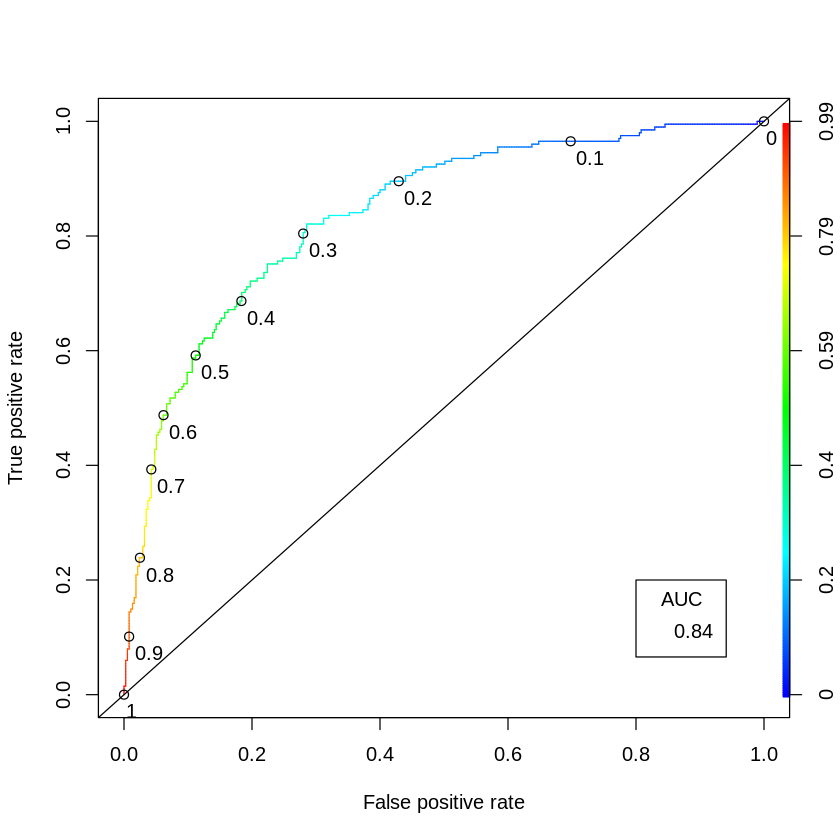

In [32]:
# Generate ROC Curves
# Vẽ biểu đồ ROC

ROCRpred = prediction(PredictTrain, train$Outcome)
ROCRperf = performance(ROCRpred, "tpr", "fpr")

# Adding threshold labels
plot(ROCRperf, colorize=TRUE, print.cutoffs.at = seq(0,1,0.1), text.adj = c(-0.2, 1.7))
abline(a=0, b=1)

auc_train <- round(as.numeric(performance(ROCRpred, "auc")@y.values),2)
legend(.8, .2, auc_train, title = "AUC", cex=1)

## Interpreting the model
## Đọc hiểu giá trị đo lường dự báo của mô hình

**AUC (Area under the ROC curve)**: Absolute value of quality of prediction  
**AUC (Area under the ROC curve)**: là giá trị tuyệt đối về chất lượng của việc dự báo

AUC = Maximum of 1 (Perfect prediction)
AUC = có giá trị cực đại là 1 (nghĩa là mô hình cho kết quả dự báo hoàn hảo)
AUC = minimum of 0.5 (just guessing)  
AUC = có giá trị thấp nhất là 0,5 (nghĩa là kết quả dự báo gần với ngẫu nhiên)

|            | Predicted class = 0        | Predicted class = 1        |
|------------|----------------------|----------------------|
| **Actual class = 0** | True Negatives (TN)  | False Positives (FP) |
| **Actual class = 1** | False Negatives (FN) | True Positives (TP)  | 

|                     | Kết quả dự báo = 0   | Kết quà dự báo = 1   |
|-------------------------|----------------------|----------------------|
| **kết quả thực tế = 0** | Âm tính thật (TN)    | Dương tính giả (FP)  |
| **Kết quả thực tế = 1** | Âm tính giả (FN)     | Dương tính thật (TP) |  

N = Number of obervations 
N = số lần quan sát
Overall accuracy = (TN + TP) / N  
Độ chính xác tổng quát = (Dương tính thật + Âm tính thật) / N

- Sensitivity = TP/(TP + FN) 
- Độ nhạy = Dương tính thật / (Dương tính thật + Âm tính giả)
- Specificity = TN/(TN + FP)  
- Độ đặc hiệu = Âm tính thật / (Âm tính thật + Dương tính giả)

Overall error rate = (FP + FN) / N  
Tỉ lệ lỗi = (Dương tính giả + Âm tính giả) / N

- False Negative Error Rate = FN/(TP + FN) 
- Tỉ lệ âm tính giả = Âm tính giả / (Dương tính thật + Âm tính giả)
- False Positive Error Rate = FP/(TN + FP)  
- Tỉ lệ Dương tính giả = Dương tính giả / (Âm tính thật + Dương tính giả)

***False positive error rate = 1 - specificity***
***Tỉ lệ dương tỉnh giả = 1 - độ đặc hiệu***



## Make predictions on test set
## Bây giờ ta sẽ đo hiệu năng dự báo của mô hình trên tập kiểm tra
### Việc này rất quan trọng để đánh giá tính độc lập tương đối, tránh hiện tượng quá khớp (overfitting) hay dưới khớp (underfitting)

In [33]:
# Making predictions on test set
# Tính hiệu năng dự báo của mô hình trên tập kiểm tra

PredictTest <- predict(AllVar, type = "response", newdata = test)

# Convert probabilities to values using the below
# Hoán đổi giá trị xác suất

## Based on ROC curve above, selected a threshold of 0.5
# Dựa vào biểu đồ ROC, ta sẽ chọn threshold là 0.5

test_tab <- table(test$Outcome, PredictTest > 0.5)
test_tab

accuracy_test <- round(sum(diag(test_tab))/sum(test_tab),2)
sprintf("Accuracy on test set is %s", accuracy_test)

    
     FALSE TRUE
  X0   115   10
  X1    25   42

[1] "Accuracy on test set is 0.82"

## Nhận xét: Như vậy, kết quả trên tập kiểm tra cao hơn trên tập huấn luyện
## Vậy là hiện tượng dưới khớp (underfitting) đã xảy ra
### Hướng giải quyết có thể là do mô hình quá đơn giản so với độ phức tạp của dữ liệu

In [34]:
# Compute test set AUC
# Tính toán giá trị AUC trên tập huấn luyện của mô hình

ROCRPredTest = prediction(PredictTest, test$Outcome)
auc = round(as.numeric(performance(ROCRPredTest, "auc")@y.values),2)
auc

[1] 0.89

## Tương tự giá trị accuracy, giá trị AUC trên tập kiểm tra cũng cao hơn giá trị AUC trên tập huấn luyện!

# Ta sẽ xem xét kĩ hơn về dữ liệu xem có thể cải thiện được hiệu năng hay không?
## Việc đầu tiên có thể nghĩ tới là làm sạch dữ liệu, ví dụ xem có dữ liệu khuyết thiếu hay không?

In [57]:
dat <- read.csv("/home/linh/Downloads/diabetes.csv")


In [142]:
# Biến đổi dạng dữ liệu Outcome từ dạng số sang dạng nhị phân (factor)
dat$Outcome <- factor(make.names(dat$Outcome))


In [58]:
biological_data <- dat[,setdiff(names(dat), c('Outcome', 'Pregnancies'))]
features_miss_num <- apply(biological_data, 2, function(x) sum(x<=0))
features_miss <- names(biological_data)[ features_miss_num > 0]
features_miss_num

Glucose            BloodPressure            SkinThickness 
                       5                       35                      227 
                 Insulin                      BMI DiabetesPedigreeFunction 
                     374                       11                        0 
                     Age 
                       0

In [59]:
rows_errors <- apply(biological_data, 1, function(x) sum(x<=0)>1) 
sum(rows_errors)

[1] 234

## Nhận xét: Như vậy dữ liệu có nhiều khuyết thiếu, tổng số khuyết thiếu lên tới 537 

In [60]:
# Xem tỉ lệ khuyết thiếu
sum(rows_errors)/nrow(dat)

[1] 0.3046875

In [61]:
biological_data[biological_data<=0] <- NA
dat[, names(biological_data)] <- biological_data

## Ta sẽ điền biến khuyết thiếu theo thuật toán KNN (K-nearest neighbors, với giá trị k=5)

In [62]:
dat_original <- dat
dat[,-9] <- knnImputation(dat[,-9], k=5)

In [63]:
# Tính phân bố dữ liệu theo tỉ lệ của số lần quan sát với biến Outcome
# Quay lại phía trên 1 chút, tại đây mình cung cấp giải pháp khác để quan sât 1 biến bất kì
# Đây là một điểm mạnh khi dùng ngôn ngữ lập trình để quan sât dữ liệu bằng nhiều cách khác nhau

prop.table(table(dat$Outcome))


       X0        X1 
0.6510417 0.3489583 

## Correlation between variables
## Tương tự phía trên, nay ta quan sát lại mối tương quan giữa các biến 
### Let’s see the correlation between numerical variables. There are variables which are highly correlated. That’s the case of Age for example.
### Ta sẽ quan sát mối tương quan giữa các biến dạng số. Sẽ có một số biến có mối tương quan mạnh, ví dụ như biến tuổi chẳng hạn

In [64]:
correlat <- cor(dat[, setdiff(names(dat), 'Outcome')])
correlat


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.00000000,0.1297037,0.210406811,0.1325765,0.08960516,0.02313687,-0.033522673,0.54434123
Glucose,0.12970373,1.0000000,0.230511935,0.2270679,0.60169777,0.23551696,0.137679934,0.26840049
BloodPressure,0.21040681,0.2305119,1.000000000,0.2220024,0.15143132,0.29312702,-0.002122848,0.33268864
SkinThickness,0.13257655,0.2270679,0.222002442,1.0000000,0.24300544,0.66359709,0.135519953,0.15539450
Insulin,0.08960516,0.6016978,0.151431318,0.2430054,1.00000000,0.27883783,0.153760380,0.28355464
BMI,0.02313687,0.2355170,0.293127018,0.6635971,0.27883783,1.00000000,0.151787668,0.02571874
DiabetesPedigreeFunction,-0.03352267,0.1376799,-0.002122848,0.1355200,0.15376038,0.15178767,1.000000000,0.03356131
Age,0.54434123,0.2684005,0.332688642,0.1553945,0.28355464,0.02571874,0.033561312,1.00000000


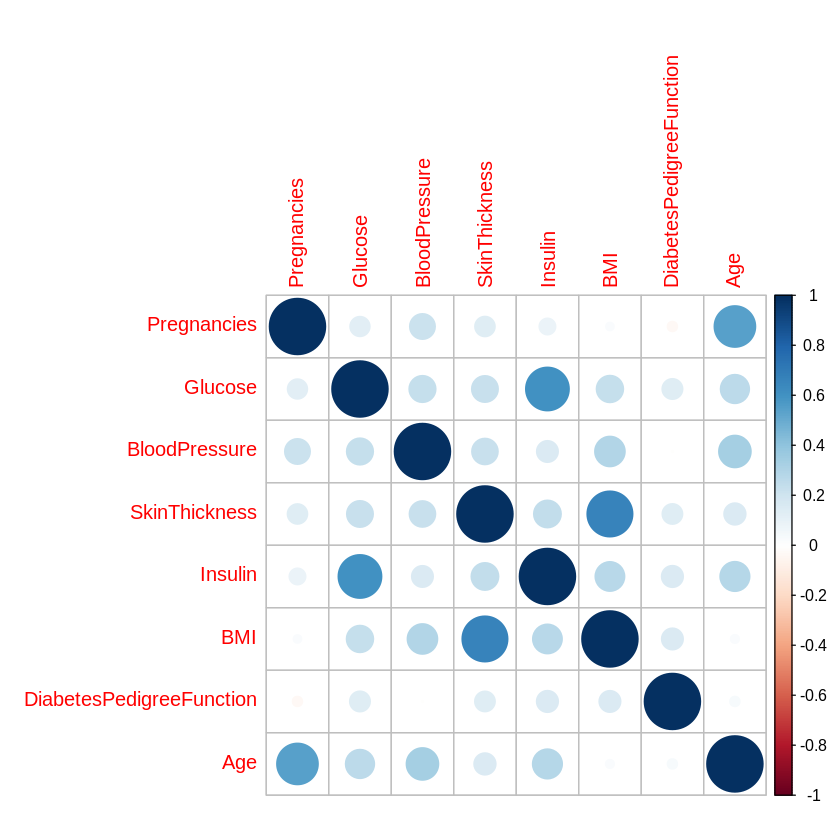

In [65]:
corrplot(correlat)


## Đây là một ví dụ rất thú vị về mối tương quan (correlation) so với mối quan hệ nhân quả (Causuality)
## Vậy nên chúng ta phải rất rất lưu ý đến ý nghĩa khi diễn giải mối tương quan

<img src="https://pbs.twimg.com/media/EjKw4aZXgAEvTUA?format=jpg&name=small">

# Univariable analysis
# Phân tích Đơn biến

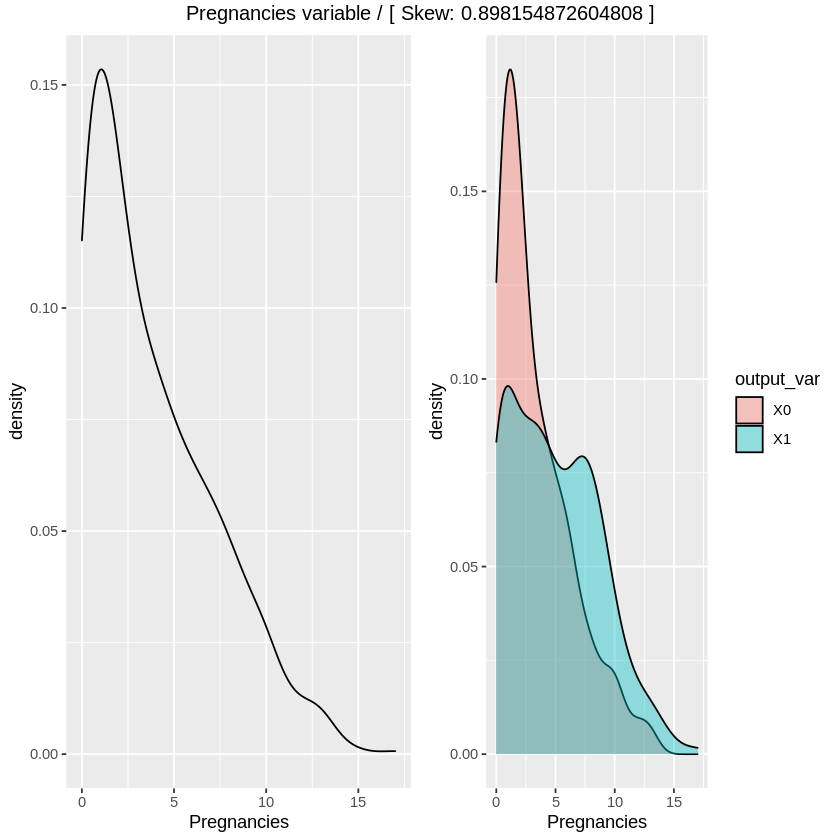

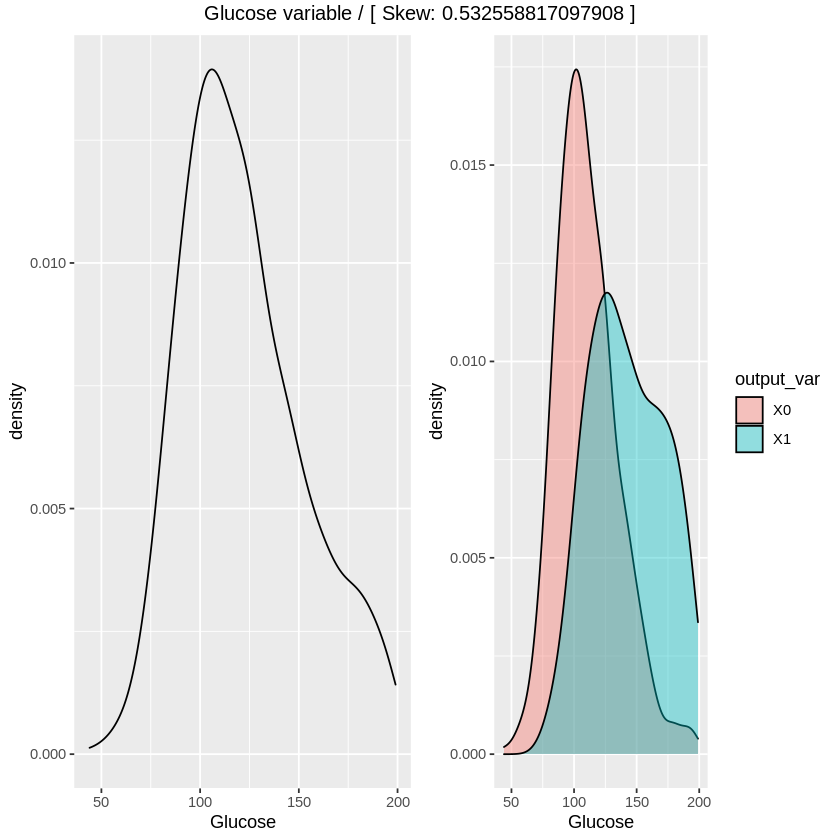

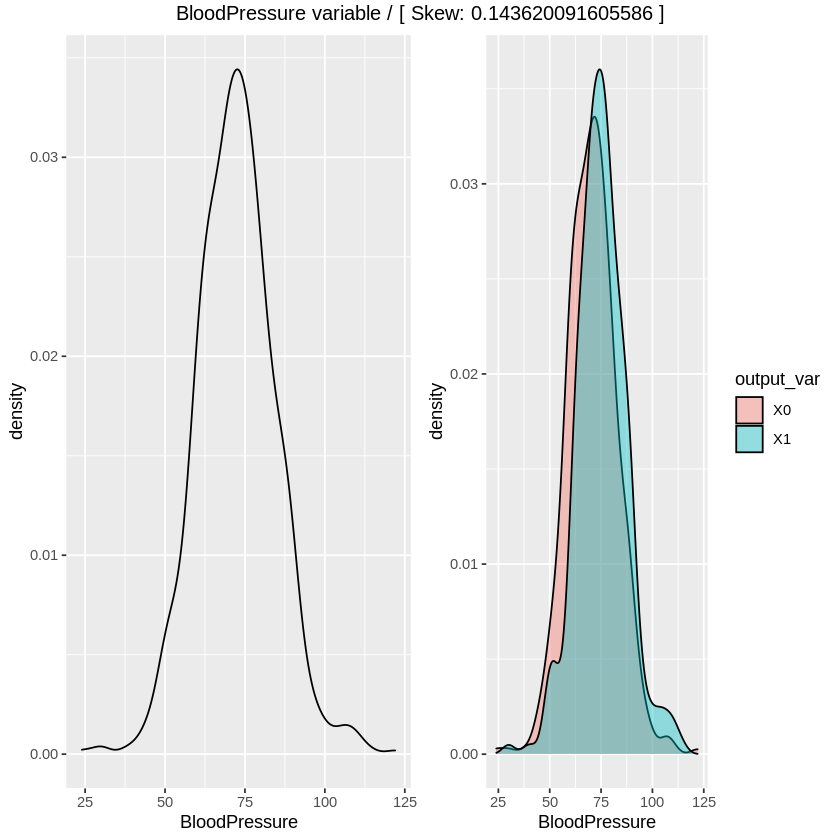

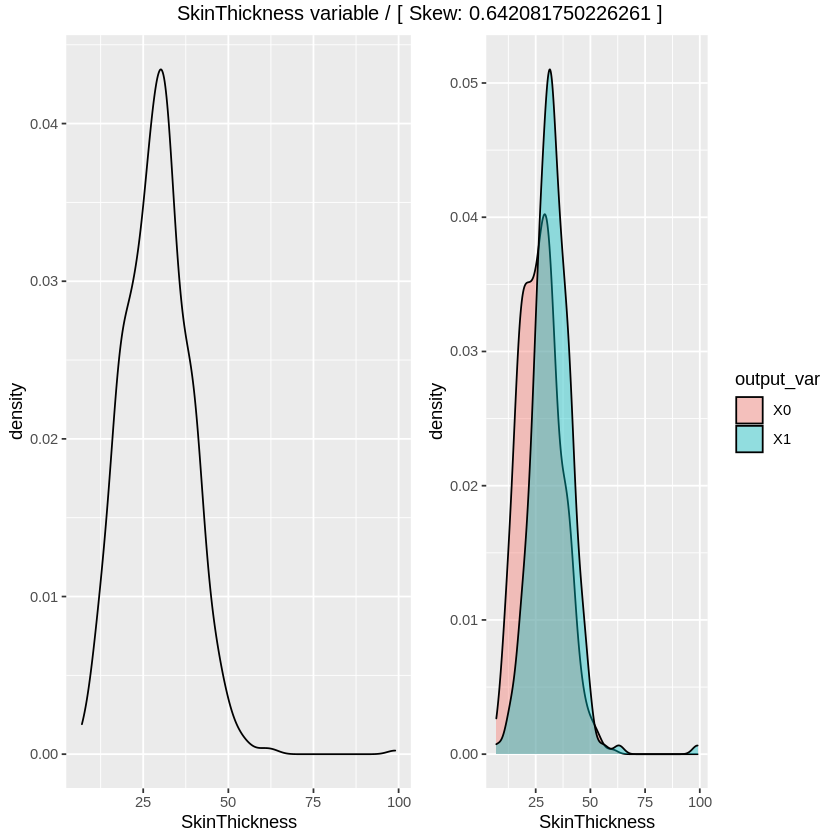

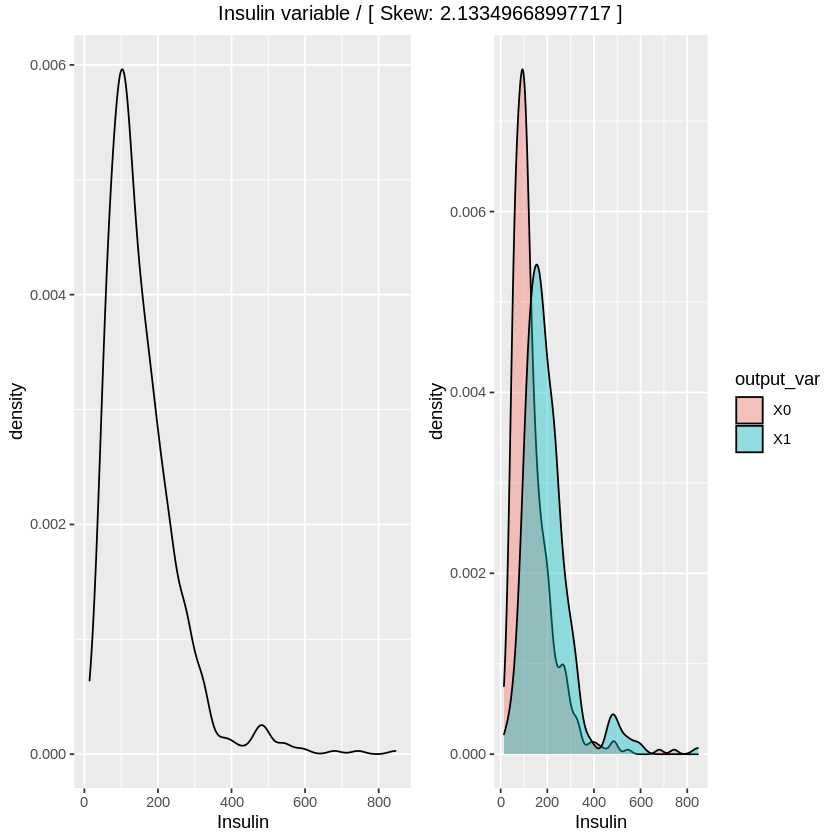

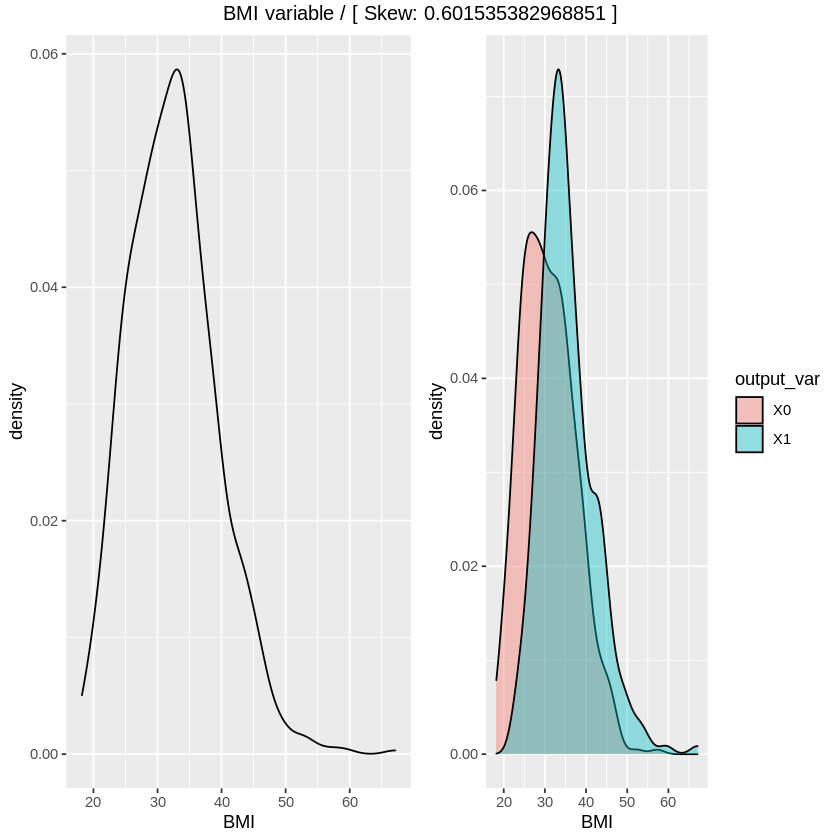

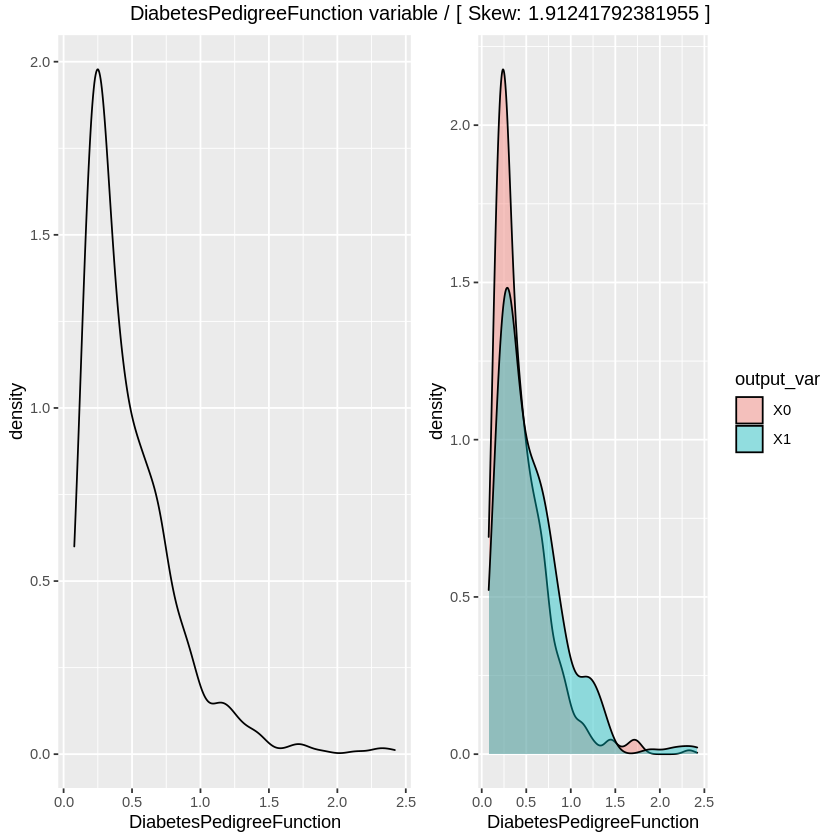

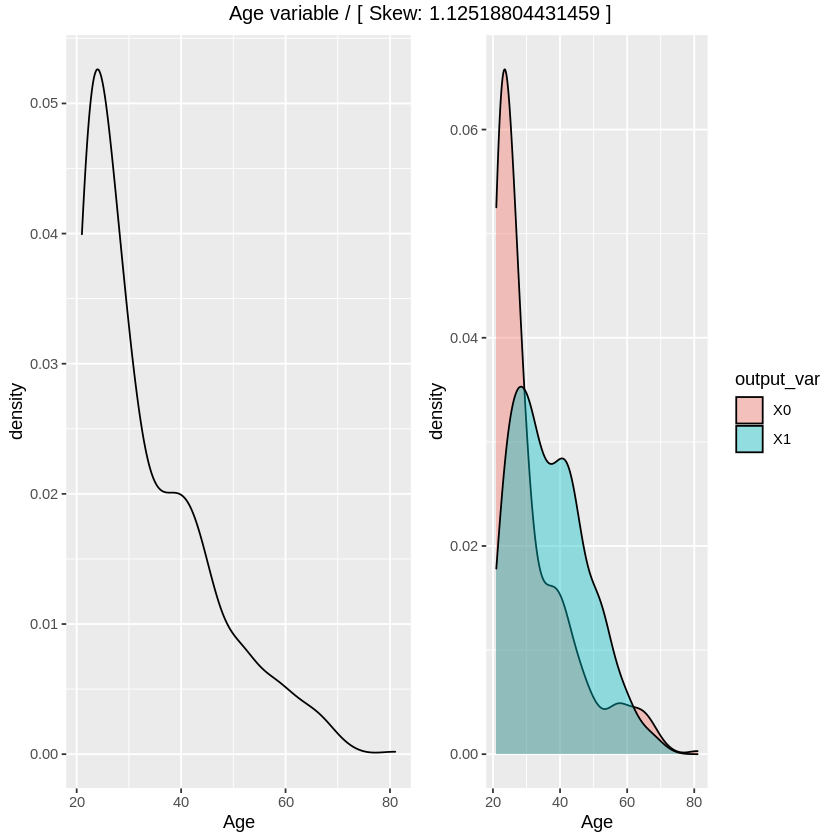

In [66]:
univar_graph <- function(univar_name, univar, data, output_var) {
  g_1 <- ggplot(data, aes(x=univar)) + geom_density() + xlab(univar_name)
  g_2 <- ggplot(data, aes(x=univar, fill=output_var)) + geom_density(alpha=0.4) + xlab(univar_name)
  grid.arrange(g_1, g_2, ncol=2, top=paste(univar_name,"variable", "/ [ Skew:",skewness(univar),"]"))
}

for (x in 1:(ncol(dat)-1)) {
  univar_graph(names(dat)[x], dat[,x], dat, dat[,'Outcome'])
}

### There are variables with high right skew (Insulin, DiabetesPedigreeFunction, Age) and other with high left skew like BloodPressure.
### Như ta đã biết các biến đo lường sinh học thường có xu hướng lệch phải (trường hợp này là các biến `Insulin`, `DiabetesPedigreeFunction`, và `Age`
### Hay các biến khác có xu hướng lêch trái `BlooPressure`
## Nói cách khác, các biến này dường như không tuân theo luật phân phối chuẩn



# Machine learning model
## Baseline model
## Let’s create a baseline model. We’ll see later if it is necessary to improve it.

## Bây giờ chúng ta sẽ tìm cách tiếp cận hướng phân tích dữ liệu mới
## Chúng ta sẽ thiết lập mô hình nền tảng để làm cơ sở so sánh về sau với các mô hình khác nhau

In [67]:
# Tạo ngẫu nhiên, việc này sẽ giúp các tính toán có tính ngẫu nhiên để tạo tính phổ quát

set.seed(1234)
# Phân chia dữ liệu theo tập huấn luyện và tập kiểm tra theo tỉ lệ 3:1
# Lần mình sẽ cung cấp giải pháp khác để phân chia dữ liệu so với phần đã làm phía trên

dindex <- createDataPartition(dat$Outcome, p=0.75, list=FALSE)
train_data <- dat_original[dindex,]
test_data <- dat_original[-dindex,]

In [68]:
mice_train_mod <- mice(train_data[, features_miss], method='rf', seed=1234, printFlag = FALSE) 
mice_test_mod <- mice(test_data[, features_miss], method='rf', seed=1234, printFlag = FALSE) 

In [69]:
train_data[, features_miss] <- complete(mice_train_mod)
test_data[, features_miss] <- complete(mice_test_mod)

In [70]:
table(train_data$Outcome)



 X0  X1 
375 201 

## Vậy là ta đã loại bỏ các dữ liệu có trường khuyết thiếu
## Nay trong tập dữ liệu có 375 bệnh nhân là không có tiểu đường và 201 bệnh nhân có tiểu đường

In [71]:
fitControl <- trainControl(method = "cv", # là phương pháp cross-validation
                           number = 10, # số lấn cross-validation là 10
                           classProbs = TRUE,
                           summaryFunction = twoClassSummary)
# các bạn có thể tham khảo thêm thuật toán cross-validatio là gì tại đây https://vitalflux.com/k-fold-cross-validation-python-example/

In [72]:
model_glm <- train(Outcome~.,
                      train_data,
                      method="glm", # hàm phân tích ở đây là glm
                      metric="ROC", # phương pháp đo lường để chọn két quả tốt nhất dựa trên ROC
                      tuneLength=10,
                      preProcess = c('center', 'scale'),
                      #classProbs = TRUE,
                      trControl=fitControl)

In [73]:
pred_glm <- predict(model_glm, test_data)
cm_glm <- confusionMatrix(pred_glm, test_data$Outcome, positive="X1")
cm_glm

Confusion Matrix and Statistics

          Reference
Prediction  X0  X1
        X0 107  29
        X1  18  38
                                          
               Accuracy : 0.7552          
                 95% CI : (0.6881, 0.8143)
    No Information Rate : 0.651           
    P-Value [Acc > NIR] : 0.001235        
                                          
                  Kappa : 0.4399          
                                          
 Mcnemar's Test P-Value : 0.144661        
                                          
            Sensitivity : 0.5672          
            Specificity : 0.8560          
         Pos Pred Value : 0.6786          
         Neg Pred Value : 0.7868          
             Prevalence : 0.3490          
         Detection Rate : 0.1979          
   Detection Prevalence : 0.2917          
      Balanced Accuracy : 0.7116          
                                          
       'Positive' Class : X1              
                              

## Vậy là ta có kết quả huấn luyện trên tập huấn luyện với mô hình là GLM (Generalized Linear Mixed Model)
### Nếu muốn quan tâm sâu hơn về GLM, các bạn có thể tham khảo tại đây https://stats.idre.ucla.edu/other/mult-pkg/introduction-to-generalized-linear-mixed-models/

## Giờ ta sẽ xem mô hình GLM này cho kết qủa như thế nào trên tập kiểm tra
### Giá trị sẽ được biểu diễn trên đường cong ROC 

Setting levels: control = X0, case = X1

Setting direction: controls < cases



X0 vs. X1,0.8556418


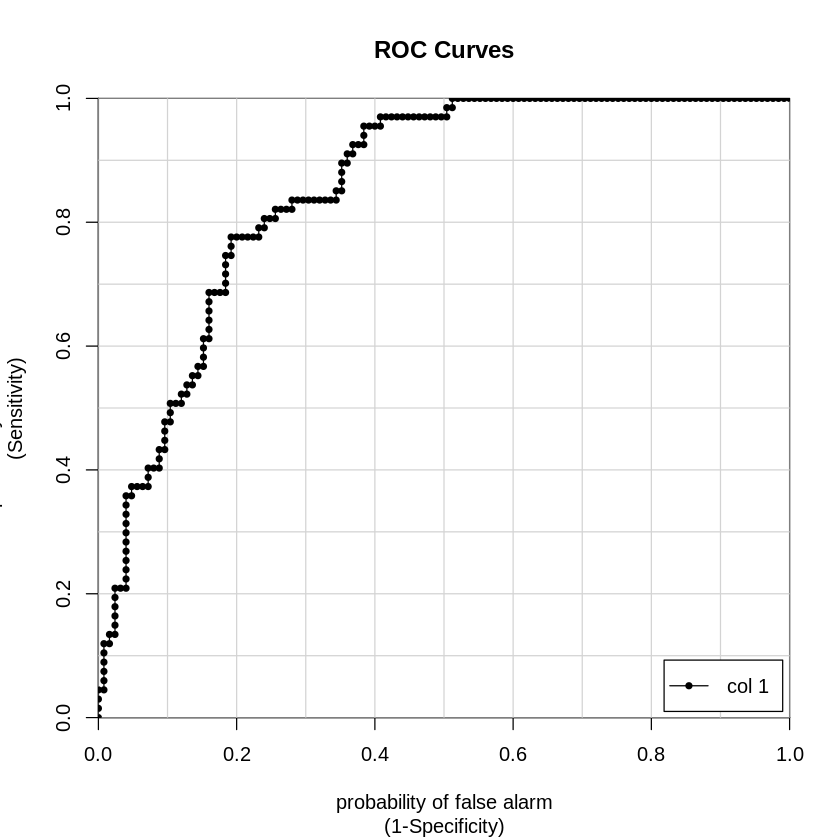

In [74]:
pred_prob_glm <- predict(model_glm, test_data, type="prob")
roc_glm <- roc(test_data$Outcome, pred_prob_glm$X1)
colAUC(pred_prob_glm$X1, test_data$Outcome, plotROC = TRUE)

## Kết quả phân tích trên tập huấn luyện và tập kiểm tra cũng có cùng xu hướng khác biệt (hiện tượng undefitting) so với phân tích trước đó
## Kết quả giữa 2 lần phân tích, cùng 1 thuật toán nhưng sử dụng các thư viện khác nhau, về cơ bản cho kết quả tương đồng

### We can see the result of this baseline model:
### Vậy là ta đã có kết quả của mô hình cơ bản để tiện so sánh với các kết quả tiếp theo

### The accuracy is not quite bad , but this is not the best metric in this case.
### Độ chĩnh xác tổng quát không quá tệ, nhưng nó vẫn chưa phải là kết quả tốt nhất trong trường hợp này.
### The AUC has a value of 0.8595833.
### Giá trị AUC bằng 0,8595833.
### The F1 score is 0.6710526.
### Giá trị F1 bằng 0.6710526.
### The recall (Sensitivity) is quite bad 0.6375.
### Độ nhạy khá tệ, bằng 0,6375.

## Next things to consider in order to build a better model than these baseline one:
## Điều tiếp theo ta có thể nghĩ tới là xây dựng mô hình cho kết quả tốt hơn mô hình GLM này:

### We have to think about the features to include in the model, because some are highly correlated (we can try PCA,…)
### Chúng ta phải nghĩ về đặc điểm của các biến trong mô hình, bởi vì một số có mối tương quan rất cao, vậy ta có thể giảm chiều dữ liệu, ví dụ dùng hàm PCA,..
### We have to work with the unbalanced problem (oversampling, synthetic cases,…)
### Chúng ta phải xử lí việc mất cân bằng dữ liệu (số ca bệnh ít hơn số người khỏe mạnh) bằng các phương pháp oversampling, upsampling,...
### We can try different machine learning models for Improving baseline model

### Chúng ta cũng có thể thử bằng các phương pháp học máy (machine learning) để tăng hiệu năng chẩn đoán của mô hình

### We can decide to build an explanatory model or a highly predictive model. We will try both cases:
### Một vấn đề phát sinh là chúng ta cần lựa chọn là việc xây dựng một mô hình có thể lí giải được hay mô hình có khả năng dự báo cao hơn nhưng không giải thích được kết quả
### Vậy chúng ta sẽ thử cả 2 phương pháp:

### Feature importance analysis
### Việc phân tích các đặc điểm quan trọng của các biến
### We are going to use the Boruta technique to find the most relevant features. Let’s take a look to see if there are unimportant variables with Boruta technique:
### Chúng ta sẽ sử dụng thư viện Boruta để tìm các biến liên quan quan trọng nhất. Nào chúng ta cùng phân tích dữ liệu

In [75]:
boruta_results <- Boruta(Outcome~., train_data)
boruta_results

Boruta performed 40 iterations in 2.342514 secs.
 7 attributes confirmed important: Age, BMI, DiabetesPedigreeFunction,
Glucose, Insulin and 2 more;
 1 attributes confirmed unimportant: BloodPressure;

## với thư viện Boruta, kết quả chỉ ra rằng có 8 biến quan trọng và 1 biến không quan trọng là `BloodPressure`
## Nhưng mình chưa thực sự tin tưởng vào phân tích này cho lắm. Chắc cần đọc kĩ hơn về thư viện Boruta, cũng như thuật toán đằng sau nó là gì!

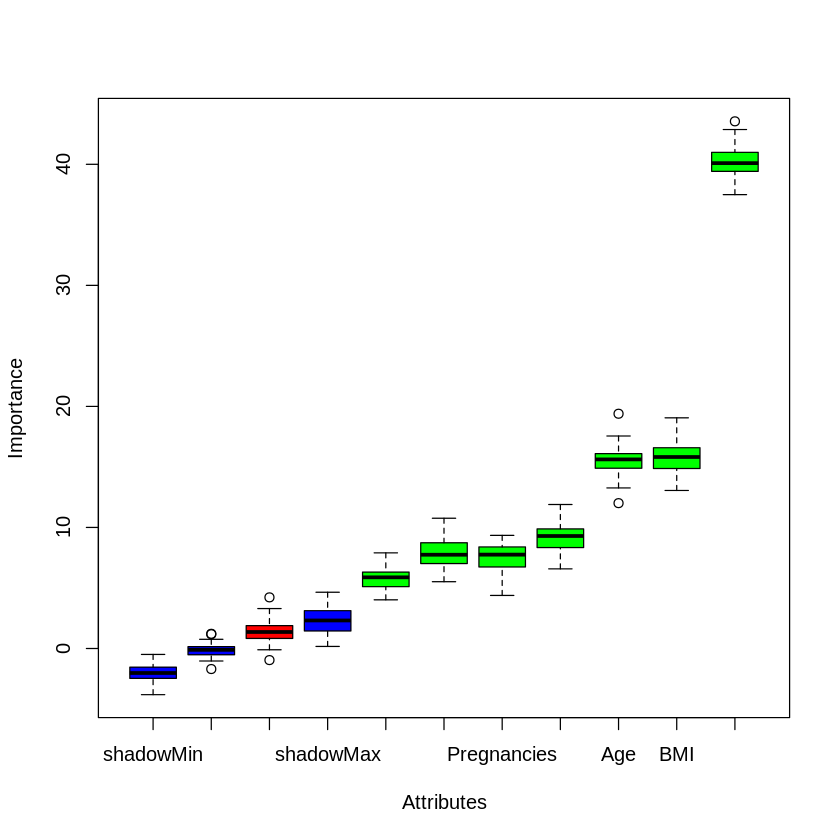

In [76]:
# Vẽ biểu độ hình hộp cho mối liên quan quan trọng giữa các biến
plot(boruta_results)


## All the variables are important except `BloodPressure`. `Glucose` is the most important one.
## Như vậy ta có thể thấy biến `BloodPressure` là ít quan trọng nhất, trong khi đó không có gì ngạc nhiên là biến `Glucose` là biến quan trọng nhất

### If we see the correlation matrix between variables, we can see some correlation, but they are below 0.75 , so that’s coherent with Boruta and it looks like we can’t ride off any feature:
### Nếu chúng ta biểu diễn kết quả bằng ma trận hỗn độn, ta sẽ thấy dường như không thể loại bỏ bất kì biến nào vì tất cả chúng đều dưới ngưỡng 0.75

In [80]:
findCorrelation(correlat, cutoff=0.75)

integer(0)

# Mô hình dự báo dựa trên thuật toán hồi qui tuyến tính tổng quát (GLM)

In [137]:
caretFuncs$summary <- twoClassSummary
rfe_ctl <- rfeControl(functions=caretFuncs, 
                    method = "cv",
                    number = 10,
                    returnResamp="final", 
                    verbose = FALSE)

In [138]:
rfe_glm <- rfe(train_data[ , setdiff(names(dat), 'Outcome')], 
                  train_data$Outcome,
                  sizes=c(1:8),
                  rfeControl=rfe_ctl,
                  method="glm",
                  metric = "ROC",
                  preProcess = c('center', 'scale'),
                  trControl = fitControl)

Warning message in train.default(x, y, ...):
“The metric "Accuracy" was not in the result set. ROC will be used instead.”


In [139]:
rfe_glm


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables    ROC   Sens   Spec   ROCSD  SensSD  SpecSD Selected
         1 0.7962 0.8934 0.5181 0.04153 0.04721 0.05859         
         2 0.8047 0.8882 0.5367 0.04962 0.06012 0.07018         
         3 0.8189 0.8854 0.5569 0.03841 0.06182 0.07767         
         4 0.8351 0.8879 0.5569 0.03866 0.06688 0.07015        *
         5 0.8286 0.8988 0.5619 0.03512 0.05584 0.07878         
         6 0.8275 0.8961 0.5619 0.03406 0.05964 0.09767         
         7 0.8269 0.8934 0.5667 0.03364 0.05771 0.09027         
         8 0.8265 0.8934 0.5667 0.03305 0.06046 0.09027         

The top 4 variables (out of 4):
   Glucose, BMI, DiabetesPedigreeFunction, Pregnancies


In [140]:
predictors(rfe_glm)


[1] "Glucose"                  "BMI"                     
[3] "DiabetesPedigreeFunction" "Pregnancies"

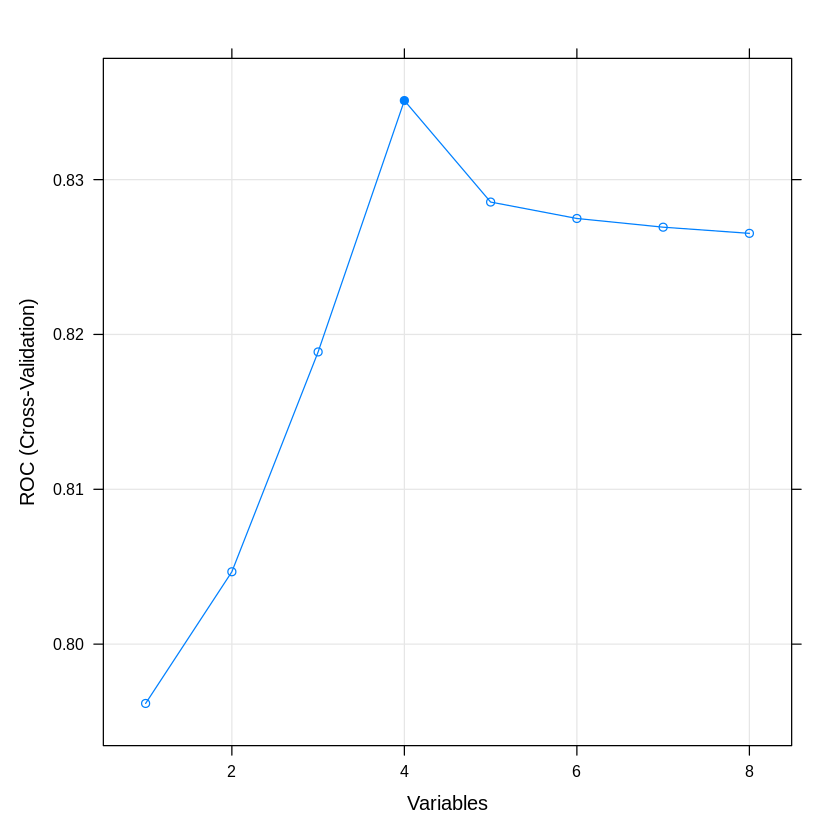

In [141]:
plot(rfe_glm, type=c("g", "o"))


# Mô hình dự báo dựa trên thuật toán hồi qui Logistic


In [128]:
summ_model_glm <- summary(model_glm$finalModel)
summ_model_glm


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6544  -0.7200  -0.4140   0.6845   2.4257  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -0.841159   0.110959  -7.581 3.43e-14 ***
Pregnancies               0.349595   0.123350   2.834  0.00459 ** 
Glucose                   1.245432   0.145235   8.575  < 2e-16 ***
BloodPressure            -0.077594   0.125313  -0.619  0.53578    
SkinThickness             0.007159   0.137750   0.052  0.95855    
Insulin                  -0.208663   0.124037  -1.682  0.09252 .  
BMI                       0.538224   0.149219   3.607  0.00031 ***
DiabetesPedigreeFunction  0.346842   0.112383   3.086  0.00203 ** 
Age                       0.139999   0.129083   1.085  0.27811    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 745.11  on 575  degrees of freedom
Residual 

In [129]:
coef_glm <- summ_model_glm$coefficients %>% 
  as.data.frame() %>% 
  mutate(Feature=rownames(summ_model_glm$coefficients)) %>%
  filter(Feature != "(Intercept)") 

In [130]:
coef_glm %>% filter(`Pr(>|z|)` < 0.05) %>% arrange(`Pr(>|z|)`)


,Estimate,Std. Error,z value,Pr(>|z|),Feature
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Glucose,1.2454320,0.1452346,8.575311,9.881961e-18,Glucose
BMI,0.5382239,0.1492194,3.606929,3.098424e-04,BMI
DiabetesPedigreeFunction,0.3468415,0.1123833,3.086236,2.027078e-03,DiabetesPedigreeFunction
Pregnancies,0.3495951,0.1233496,2.834180,4.594338e-03,Pregnancies


In [131]:
rfe_glm



Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables    ROC   Sens   Spec   ROCSD  SensSD SpecSD Selected
         1 0.7932 0.8882 0.5119 0.05008 0.05788 0.1405         
         2 0.8083 0.8961 0.5219 0.05102 0.05886 0.1412         
         3 0.8180 0.8828 0.5467 0.04662 0.08001 0.1337         
         4 0.8358 0.8883 0.5521 0.05197 0.06645 0.1132        *
         5 0.8311 0.8856 0.5619 0.05290 0.06342 0.0918         
         6 0.8311 0.8935 0.5717 0.05445 0.06933 0.1022         
         7 0.8308 0.8962 0.5617 0.05358 0.06861 0.1039         
         8 0.8296 0.8962 0.5567 0.05405 0.06861 0.1134         

The top 4 variables (out of 4):
   Glucose, BMI, DiabetesPedigreeFunction, Pregnancies


In [132]:
predictors(rfe_glm)


[1] "Glucose"                  "BMI"                     
[3] "DiabetesPedigreeFunction" "Pregnancies"

In [133]:
model_glmnet <- train(Outcome~.,
                      train_data,
                      method="glmnet",
                      metric="ROC",
                      tuneLength=20,
                      preProcess = c('center', 'scale'),
                      trControl=fitControl)

In [134]:
pred_glmnet <- predict(model_glmnet, test_data)
cm_glmnet <- confusionMatrix(pred_glmnet, test_data$Outcome, positive="X1")
cm_glmnet

Confusion Matrix and Statistics

          Reference
Prediction  X0  X1
        X0 111  33
        X1  14  34
                                          
               Accuracy : 0.7552          
                 95% CI : (0.6881, 0.8143)
    No Information Rate : 0.651           
    P-Value [Acc > NIR] : 0.001235        
                                          
                  Kappa : 0.4233          
                                          
 Mcnemar's Test P-Value : 0.008650        
                                          
            Sensitivity : 0.5075          
            Specificity : 0.8880          
         Pos Pred Value : 0.7083          
         Neg Pred Value : 0.7708          
             Prevalence : 0.3490          
         Detection Rate : 0.1771          
   Detection Prevalence : 0.2500          
      Balanced Accuracy : 0.6977          
                                          
       'Positive' Class : X1              
                              

In [135]:
pred_prob_glmnet <- predict(model_glmnet, test_data, type="prob")
roc_glmnet <- roc(test_data$Outcome, pred_prob_glmnet$X1)

Setting levels: control = X0, case = X1

Setting direction: controls < cases



In [136]:
cm_glmnet$byClass


Sensitivity          Specificity       Pos Pred Value 
           0.5074627            0.8880000            0.7083333 
      Neg Pred Value            Precision               Recall 
           0.7708333            0.7083333            0.5074627 
                  F1           Prevalence       Detection Rate 
           0.5913043            0.3489583            0.1770833 
Detection Prevalence    Balanced Accuracy 
           0.2500000            0.6977313

# Mô hình dụ báo dựa trên thuật toán cây phân loại (classification trees)

In [85]:
model_rpart <- train(Outcome~.,
                      train_data,
                      method="rpart",
                      metric="ROC",
                      tuneLength=20,
                      trControl=fitControl)

In [86]:
pred_rpart <- predict(model_rpart, test_data)
cm_rpart <- confusionMatrix(pred_rpart, test_data$Outcome, positive="X1")
cm_rpart

Confusion Matrix and Statistics

          Reference
Prediction  X0  X1
        X0 100  30
        X1  25  37
                                         
               Accuracy : 0.7135         
                 95% CI : (0.644, 0.7763)
    No Information Rate : 0.651          
    P-Value [Acc > NIR] : 0.03928        
                                         
                  Kappa : 0.3584         
                                         
 Mcnemar's Test P-Value : 0.58964        
                                         
            Sensitivity : 0.5522         
            Specificity : 0.8000         
         Pos Pred Value : 0.5968         
         Neg Pred Value : 0.7692         
             Prevalence : 0.3490         
         Detection Rate : 0.1927         
   Detection Prevalence : 0.3229         
      Balanced Accuracy : 0.6761         
                                         
       'Positive' Class : X1             
                                         

In [118]:
pred_prob_rpart <- predict(model_rpart, test_data, type="prob")
roc_rpart <- roc(test_data$Outcome, pred_prob_rpart$X1)

Setting levels: control = X0, case = X1

Setting direction: controls < cases



In [126]:
cm_rpart$byClass

Sensitivity          Specificity       Pos Pred Value 
           0.5522388            0.8000000            0.5967742 
      Neg Pred Value            Precision               Recall 
           0.7692308            0.5967742            0.5522388 
                  F1           Prevalence       Detection Rate 
           0.5736434            0.3489583            0.1927083 
Detection Prevalence    Balanced Accuracy 
           0.3229167            0.6761194

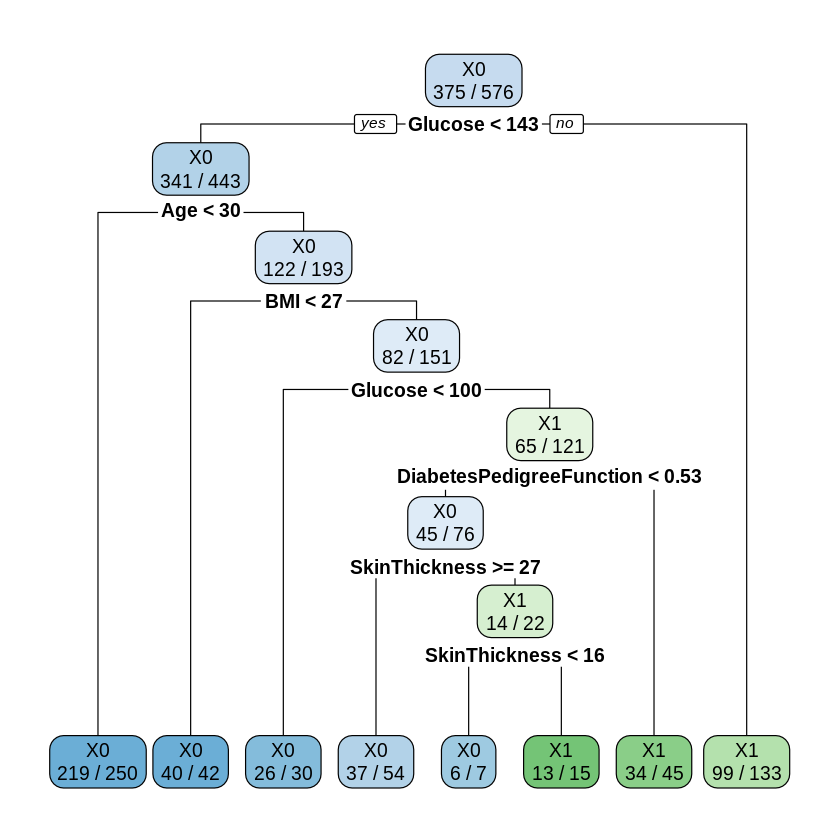

In [127]:
rpart.plot(model_rpart$finalModel, type = 2, fallen.leaves = T, extra = 2)


# Mô hình dụ báo dựa trên thuật toán Random Forest

In [102]:
model_rf <- train(Outcome~.,
                      train_data,
                      method="ranger",
                      metric="ROC",
                      tuneLength=20,
                      trControl=fitControl)

note: only 7 unique complexity parameters in default grid. Truncating the grid to 7 .



In [103]:
pred_rf <- predict(model_rf, test_data)
cm_rf <- confusionMatrix(pred_rf, test_data$Outcome, positive="X1")
cm_rf

Confusion Matrix and Statistics

          Reference
Prediction  X0  X1
        X0 111  30
        X1  14  37
                                          
               Accuracy : 0.7708          
                 95% CI : (0.7048, 0.8283)
    No Information Rate : 0.651           
    P-Value [Acc > NIR] : 0.0002216       
                                          
                  Kappa : 0.4661          
                                          
 Mcnemar's Test P-Value : 0.0237385       
                                          
            Sensitivity : 0.5522          
            Specificity : 0.8880          
         Pos Pred Value : 0.7255          
         Neg Pred Value : 0.7872          
             Prevalence : 0.3490          
         Detection Rate : 0.1927          
   Detection Prevalence : 0.2656          
      Balanced Accuracy : 0.7201          
                                          
       'Positive' Class : X1              
                              

In [120]:
pred_prob_rf <- predict(model_rf, test_data, type="prob")
roc_rf <- roc(test_data$Outcome, pred_prob_rf$X1)

Setting levels: control = X0, case = X1

Setting direction: controls < cases



In [125]:
cm_rf$byClass

Sensitivity          Specificity       Pos Pred Value 
           0.5522388            0.8880000            0.7254902 
      Neg Pred Value            Precision               Recall 
           0.7872340            0.7254902            0.5522388 
                  F1           Prevalence       Detection Rate 
           0.6271186            0.3489583            0.1927083 
Detection Prevalence    Balanced Accuracy 
           0.2656250            0.7201194

# Mô hình dụ báo dựa trên thuật toán XGBOOST

In [107]:
xgb_grid_1 = expand.grid(
  nrounds = 50,
  eta = c(0.03),
  max_depth = 1,
  gamma = 0,
  colsample_bytree = 0.6,
  min_child_weight = 1,
  subsample = 0.5
)
model_xgbTree <- train(Outcome~.,
                      train_data,
                      method="xgbTree",
                      metric="ROC",
                      tuneGrid=xgb_grid_1,
                      trControl=fitControl)

In [108]:
pred_xgbTree <- predict(model_xgbTree, test_data)
cm_xgbTree <- confusionMatrix(pred_xgbTree, test_data$Outcome, positive="X1")
cm_xgbTree

Confusion Matrix and Statistics

          Reference
Prediction  X0  X1
        X0 111  37
        X1  14  30
                                         
               Accuracy : 0.7344         
                 95% CI : (0.666, 0.7954)
    No Information Rate : 0.651          
    P-Value [Acc > NIR] : 0.008462       
                                         
                  Kappa : 0.3648         
                                         
 Mcnemar's Test P-Value : 0.002066       
                                         
            Sensitivity : 0.4478         
            Specificity : 0.8880         
         Pos Pred Value : 0.6818         
         Neg Pred Value : 0.7500         
             Prevalence : 0.3490         
         Detection Rate : 0.1562         
   Detection Prevalence : 0.2292         
      Balanced Accuracy : 0.6679         
                                         
       'Positive' Class : X1             
                                         

In [122]:
pred_prob_xgbTree <- predict(model_xgbTree, test_data, type="prob")
roc_xgbTree <- roc(test_data$Outcome, pred_prob_xgbTree$X1)

Setting levels: control = X0, case = X1

Setting direction: controls < cases



In [124]:
cm_xgbTree$byClass

Sensitivity          Specificity       Pos Pred Value 
           0.4477612            0.8880000            0.6818182 
      Neg Pred Value            Precision               Recall 
           0.7500000            0.6818182            0.4477612 
                  F1           Prevalence       Detection Rate 
           0.5405405            0.3489583            0.1562500 
Detection Prevalence    Balanced Accuracy 
           0.2291667            0.6678806

# Mô hình dụ báo dựa trên thuật toán KNN

In [109]:
model_knn <- train(Outcome~.,
                      train_data,
                      method="knn",
                      metric="ROC",
                      tuneGrid = expand.grid(.k=c(3:10)),
                      trControl=fitControl)

In [110]:
pred_knn <- predict(model_knn, test_data) # dự báo trên tập kiểm tra
cm_knn <- confusionMatrix(pred_knn, test_data$Outcome, positive="X1")
cm_knn

Confusion Matrix and Statistics

          Reference
Prediction  X0  X1
        X0 107  31
        X1  18  36
                                         
               Accuracy : 0.7448         
                 95% CI : (0.677, 0.8048)
    No Information Rate : 0.651          
    P-Value [Acc > NIR] : 0.003401       
                                         
                  Kappa : 0.4119         
                                         
 Mcnemar's Test P-Value : 0.086476       
                                         
            Sensitivity : 0.5373         
            Specificity : 0.8560         
         Pos Pred Value : 0.6667         
         Neg Pred Value : 0.7754         
             Prevalence : 0.3490         
         Detection Rate : 0.1875         
   Detection Prevalence : 0.2812         
      Balanced Accuracy : 0.6967         
                                         
       'Positive' Class : X1             
                                         

In [111]:
pred_prob_knn <- predict(model_knn, test_data, type="prob")
roc_knn <- roc(test_data$Outcome, pred_prob_knn$X1)

Setting levels: control = X0, case = X1

Setting direction: controls < cases



In [112]:
cm_knn$byClass

Sensitivity          Specificity       Pos Pred Value 
           0.5373134            0.8560000            0.6666667 
      Neg Pred Value            Precision               Recall 
           0.7753623            0.6666667            0.5373134 
                  F1           Prevalence       Detection Rate 
           0.5950413            0.3489583            0.1875000 
Detection Prevalence    Balanced Accuracy 
           0.2812500            0.6966567

# Model comparasion
# So sánh hiệu năng dự báo của các mô hình
## We are going to compare these models over the training and resampling data:
## Chúng ta sẽ so sánh hiệu năng của các mô hình dự báo khác nhau

## Vẽ biểu đồ hình hộp so sánh giá trị AUC giữa các mô hình tiên lượng

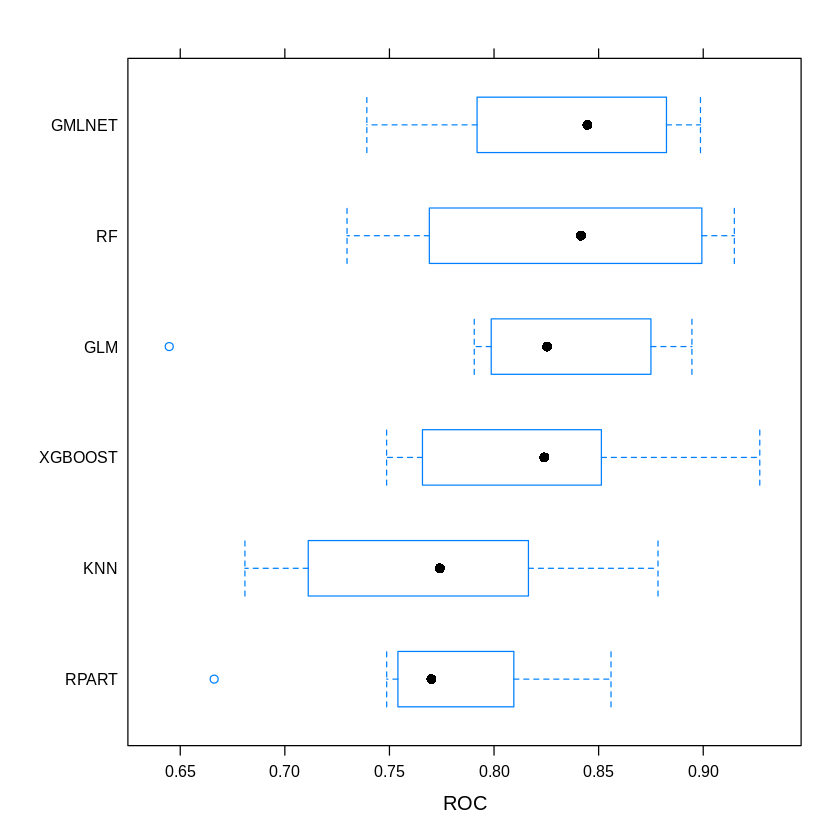

In [113]:
model_list <- list(GLM=model_glm, GMLNET=model_glmnet , RPART=model_rpart, RF=model_rf, XGBOOST=model_xgbTree, KNN=model_knn)
resamples <- resamples(model_list)
bwplot(resamples, metric="ROC")

## Tạo ma trận so sánh hiệu năng giữa các mô hình


In [114]:
model_cor <- modelCor(resamples)
model_cor

,GLM,GMLNET,RPART,RF,XGBOOST,KNN
GLM,1.000000000,0.09161987,-0.25256077,0.005039039,0.2180645,-0.1728595
GMLNET,0.091619867,1.00000000,0.36819607,-0.298934772,0.7774521,-0.4646863
RPART,-0.252560772,0.36819607,1.00000000,-0.050042670,0.3079531,-0.5231582
RF,0.005039039,-0.29893477,-0.05004267,1.000000000,0.1212028,-0.3893669
XGBOOST,0.218064470,0.77745214,0.30795314,0.121202838,1.0000000,-0.7230675
KNN,-0.172859512,-0.46468631,-0.52315823,-0.389366927,-0.7230675,1.0000000


## Vẽ biểu đồ tương quan giữa các mô hình


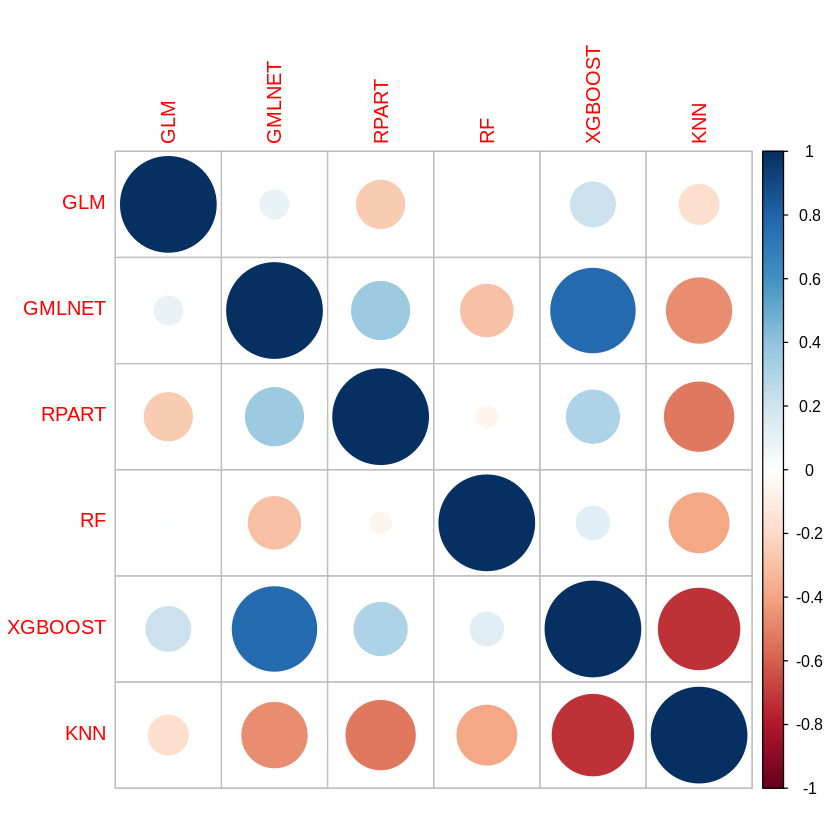

In [115]:
corrplot(model_cor)

## Tạo bảng so sánh hiệu năng giữa các mô hình dự báo

In [123]:
results_glm <- c(cm_glm$byClass['Sensitivity'], cm_glm$byClass['F1'], roc_glm$auc)
results_glmnet <- c(cm_glmnet$byClass['Sensitivity'], cm_glmnet$byClass['F1'], roc_glmnet$auc)
results_rpart <- c(cm_rpart$byClass['Sensitivity'], cm_rpart$byClass['F1'], roc_rpart$auc)
results_rf <- c(cm_rpart$byClass['Sensitivity'], cm_rf$byClass['F1'], roc_rf$auc)
results_xgbTree <- c(cm_xgbTree$byClass['Sensitivity'], cm_xgbTree$byClass['F1'], roc_xgbTree$auc)
results_knn <- c(cm_knn$byClass['Sensitivity'], cm_knn$byClass['F1'], roc_knn$auc)

results <- data.frame(rbind(results_glm, results_glmnet, results_rpart, results_rf, results_xgbTree, results_knn))
names(results) <- c("Sensitivity", "F1", "AUC")
results

,Sensitivity,F1,AUC
,<dbl>,<dbl>,<dbl>
results_glm,0.5671642,0.6178862,0.8556418
results_glmnet,0.4925373,0.5789474,0.8632836
results_rpart,0.5522388,0.5736434,0.7245970
results_rf,0.5522388,0.6271186,0.8392239
results_xgbTree,0.4477612,0.5405405,0.8196418
results_knn,0.5373134,0.5950413,0.7685970


# Một số nhận xét:
## Simple logistic regression looks like to be the best model here: best sensitivity, F1 score and AUC.
## Mô hình hồi qui logistic hoạt động động tốt nhất trong trường hợp này với các thông số đo lường như: độ nhạy, chỉ số F1 và AUC
## So với mô hình hồi qui logistic với dữ liệu khuyết thiếu, mô hình hôi qui logistic khi điền các giá trị khuyết thiếu bằng phương pháp KNN (k=5)
## làm kết quả tệ hơn. Nguyên nhân có thể (1) phương pháp điền giá trị khuyết thiếu là KNN là không phù hợp; (2) Có thể xuất hiện các biases, Confounders, hay collidiers?
## Giải pháp: có thể tìm phương pháp điền các giá trị khuyết thiếu và/hoặc tìm cách giảm chiều dữ liệu bằng phương pháp khác!

## We have developed some explanatory models (classification tree and linear regression). They show us what are the most important factors in order to have a person diabetes. 
## Predictive models should be improve prediction performance but they don’t provide outstanding results.

## Bên cạnh đó, chúng ta đã xây dựng một số mô hình có thể giải thích được (cây phân loại và hồi qui tuyến tính. Chúng cho ta thấy đâu là yếu tố quan trọng nhất liên quan tới việc phát sinh bệnh tiểu đường
## Mô hình dự bá có thể cải thiện được hiệu năng nhưng chúng không/chưa cung cấp kết quả vượt trội 

Nguồn tham khảo tại đây:
1. https://www.kaggle.com/lbronchal/pima-indians-diabetes-database-analysis?fbclid=IwAR03D7tVB7Ml2dG9zXxDPHLK6XiluZ0cCHuHDISXT94cUSNmVN-qOS-vPC4

1. https://www.kaggle.com/ksp585/pima-indian-diabetes-logistic-regression-with-r?fbclid=IwAR1qHCuKpW4HfUebarhPJkf-YO5TPjm2C7H0tcAunVbjpJL9cS2a33dsNj4